# Standard Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [74]:
from os import system
from scipy.spatial.distance import euclidean
from catboost import CatBoostRegressor, CatBoostClassifier, Pool

In [3]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import naive_bayes

In [4]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA, NMF
from sklearn.feature_selection import SelectKBest, chi2

In [204]:
# Useful trick when running things that take a long time.
#system('say I am done!');

# Read in CSVs, create DFs

In [5]:
train = pd.read_csv('train 3.csv')
train_clas = pd.read_csv('train 3.csv')

In [6]:
test = pd.read_csv('test.csv')
test_clas = pd.read_csv('test.csv')

In [7]:
col_list = train.columns

In [8]:
col_list = list(col_list)[1:]

In [284]:
#col_list

In [163]:
#full = pd.read_csv('covtype.data', names=col_list)

In [164]:
#full_clas = full

In [9]:
#convert Id & Cover Type to strings, since they are not numeric features
train['Id'] = train['Id'].apply(str)
train['Cover_Type'] = train['Cover_Type'].apply(str)
#full['Cover_Type'] = full['Cover_Type'].apply(str)
test['Id'] = test['Id'].apply(str)
test_clas['Id'] = test_clas['Id'].apply(str)
train_clas['Id'] = train_clas['Id'].apply(str)
train_clas['Cover_Type'] = train_clas['Cover_Type'].apply(str)
#full_clas['Cover_Type'] = full_clas['Cover_Type'].apply(str)

In [150]:
#instantiate a cover_type field for test set
test_clas['Cover_Type'] = '0'
test['Cover_Type'] = '0'

In [11]:
#function that will turn binary features into categorical features for use with random forests
def to_categorical(df, column, samples):
    for i in range(1, samples+1):
        df[column][df[column+str(i)]==1] = str(i)
    #df[column] = df[column].apply(str)
    return df[column]

In [12]:
test_clas['Soil_Type'] = '0'
test_clas['Wilderness_Area'] = '0'
train_clas['Soil_Type'] = '0'
train_clas['Wilderness_Area'] = '0'
#full_clas['Soil_Type'] = '0'
#full_clas['Wilderness_Area'] = '0'

In [14]:
test_clas['Soil_Type'] = to_categorical(test_clas,'Soil_Type',40)
train_clas['Soil_Type'] = to_categorical(train_clas,'Soil_Type',40)
#full_clas['Soil_Type'] = to_categorical(full_clas,'Soil_Type',40)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [15]:
#full_clas['Wilderness_Area'] = to_categorical(full_clas,'Wilderness_Area',4)
train_clas['Wilderness_Area'] = to_categorical(train_clas,'Wilderness_Area',4)
test_clas['Wilderness_Area'] = to_categorical(test_clas,'Wilderness_Area',4)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [16]:
# #drop binary features from categorical dfs
train_clas = train_clas[['Id','Elevation','Aspect','Slope','Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology','Horizontal_Distance_To_Roadways','Hillshade_9am','Hillshade_Noon','Hillshade_3pm','Horizontal_Distance_To_Fire_Points', 'Cover_Type','Wilderness_Area','Soil_Type']]
test_clas = test_clas[['Id','Elevation','Aspect','Slope','Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology','Horizontal_Distance_To_Roadways','Hillshade_9am','Hillshade_Noon','Hillshade_3pm','Horizontal_Distance_To_Fire_Points','Wilderness_Area','Soil_Type']]
#full_clas = full_clas[['Elevation','Aspect','Slope','Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology','Horizontal_Distance_To_Roadways','Hillshade_9am','Hillshade_Noon','Hillshade_3pm','Horizontal_Distance_To_Fire_Points','Wilderness_Area','Soil_Type']]

In [17]:
train_clas['Cover_Type_Name'] = 'null'
train_clas['Cover_Type_Name'][(train_clas['Cover_Type']=='1')] = 'Spruce/Fir'
train_clas['Cover_Type_Name'][(train_clas['Cover_Type']=='2')] = 'Lodgepole Pine'
train_clas['Cover_Type_Name'][(train_clas['Cover_Type']=='3')] = 'Ponderose Pine'
train_clas['Cover_Type_Name'][(train_clas['Cover_Type']=='4')] = 'Cottonwood/Willow'
train_clas['Cover_Type_Name'][(train_clas['Cover_Type']=='5')] = 'Aspen'
train_clas['Cover_Type_Name'][(train_clas['Cover_Type']=='6')] = 'Douglas-fir'
train_clas['Cover_Type_Name'][(train_clas['Cover_Type']=='7')] = 'Krummholz'

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ip

In [18]:
train_clas['Wilderness_Area_Name'] = 'null'
train_clas['Wilderness_Area_Name'][(train_clas['Wilderness_Area']=='1')] = 'Rahwah Wilderness'
train_clas['Wilderness_Area_Name'][(train_clas['Wilderness_Area']=='2')] = 'Neota Wilderness'
train_clas['Wilderness_Area_Name'][(train_clas['Wilderness_Area']=='3')] = 'Comanche Peak Wilderness'
train_clas['Wilderness_Area_Name'][(train_clas['Wilderness_Area']=='4')] = 'Cache la Poudre Wilderness'

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ip

In [118]:
# #played with creating new variable of true distance to water
# test['Dist_To_Water'] = (test['Horizontal_Distance_To_Hydrology']**2 + test['Vertical_Distance_To_Hydrology']**2)**.5
# train['Dist_To_Water'] = (train['Horizontal_Distance_To_Hydrology']**2 + train['Vertical_Distance_To_Hydrology']**2)**.5

In [94]:
# #a way to show all columns in a dataframe (and all rows if needed)
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#     display(full.head(1))

Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0       2596      51      3                               258   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                               0                              510   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0            221             232            148   

   Horizontal_Distance_To_Fire_Points  Wilderness_Area1  Wilderness_Area2  \
0                                6279                 1                 0   

   Wilderness_Area3  Wilderness_Area4  Soil_Type1  Soil_Type2  Soil_Type3  \
0                 0                 0           0           0           0   

   Soil_Type4  Soil_Type5  Soil_Type6  Soil_Type7  Soil_Type8  Soil_Type9  \
0           0           0           0           0           0           0   

   Soil_Type10  Soil_Type11  Soil_Type12  Soil_Type13  Soil_Type14  \
0            0            0            0            0            0   

   Soil_Type15  Soil_Type16  Soil_Type17  Soil_Type18  Soil_Type19  \
0            0            0            0            0            0   

   Soil_Type20  Soil_Type21  Soil_Type22  Soil_Type23  Soil_Type24  \
0            0            0            0            0            0   

   Soil_Type25  Soil_Type26  Soil_Type27  Soil_Type28  Soil_Type29  \
0            0            0            0            0            1   

   Soil_Type30  Soil_Type31  Soil_Type32  Soil_Type33  Soil_Type34  \
0            0            0            0            0            0   

   Soil_Type35  Soil_Type36  Soil_Type37  Soil_Type38  Soil_Type39  \
0            0            0            0            0            0   

   Soil_Type40 Cover_Type  
0            0          5

# Begin exploratory data visualizations

In [40]:
fig = plt.subplots(figsize=(8,8))
sns.swarmplot(x='Wilderness_Area',y='Elevation', data=train_clas)
plt.savefig('wilderness_elevation.svg', format='svg')
plt.savefig('wilderness_elevation.png', dpi=300)
plt.show();

In [42]:
fig = plt.subplots(figsize=(8,8))
sns.swarmplot(x='Cover_Type',y='Wilderness_Area', data=train_clas)
plt.savefig('wilderness_cover.svg', format='svg')
plt.savefig('wilderness_cover.png', dpi=300)
plt.show();

/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1232: RuntimeWarning: invalid value encountered in sqrt
  dx = np.sqrt(d ** 2 - dy ** 2) * 1.05


In [206]:
fig = plt.subplots(figsize=(8,8))
g= sns.swarmplot(x='Cover_Type_Name',y='Elevation', data=train_clas, hue='Wilderness_Area_Name')
plt.xticks(rotation=45)
plt.gcf().subplots_adjust(bottom=0.15)
plt.savefig('cover_elevation.svg', format='svg')
plt.savefig('cover_elevation.png', dpi=300)
plt.show();

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


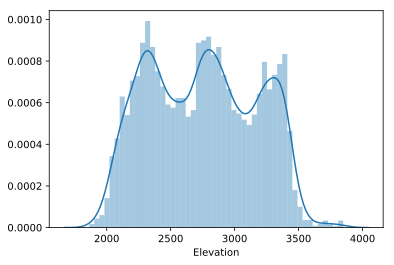

In [44]:
sns.distplot(train['Elevation'], bins=50)
plt.savefig('elevation.svg', format='svg')
plt.savefig('elevation.png', dpi=300)
plt.show();

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


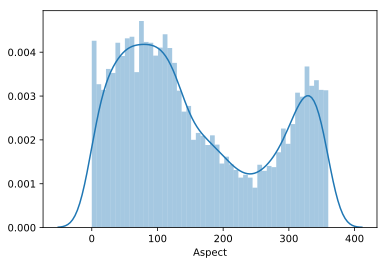

In [45]:
sns.distplot(train['Aspect'], bins=50);
plt.savefig('aspect.svg', format='svg')
plt.savefig('aspect.png', dpi=300)
plt.show();

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


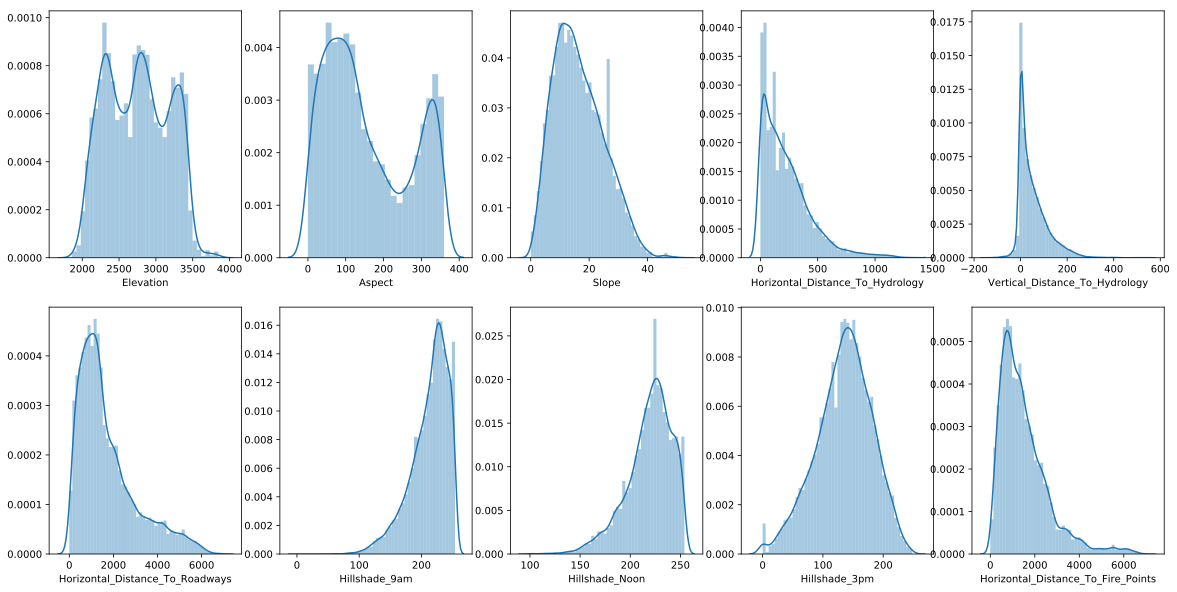

In [46]:
fig,axs = plt.subplots(nrows=2, ncols=5, figsize=(20,10))
sns.distplot(train['Elevation'], ax=axs[0,0])
sns.distplot(train['Aspect'], ax=axs[0,1])
sns.distplot(train['Slope'], ax=axs[0,2])
sns.distplot(train['Horizontal_Distance_To_Hydrology'], ax=axs[0,3])
sns.distplot(train['Vertical_Distance_To_Hydrology'], ax=axs[0,4])
sns.distplot(train['Horizontal_Distance_To_Roadways'], ax=axs[1,0])
sns.distplot(train['Hillshade_9am'], ax=axs[1,1])
sns.distplot(train['Hillshade_Noon'], ax=axs[1,2])
sns.distplot(train['Hillshade_3pm'], ax=axs[1,3])
sns.distplot(train['Horizontal_Distance_To_Fire_Points'], ax=axs[1,4])
plt.savefig('dist_plots.svg', format='svg')
plt.savefig('dist_plots.png', dpi=300)
plt.show();

In [57]:
cols_to_corr=['Elevation','Aspect','Slope','Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology','Horizontal_Distance_To_Roadways','Hillshade_9am','Hillshade_Noon','Hillshade_3pm','Horizontal_Distance_To_Fire_Points' ]

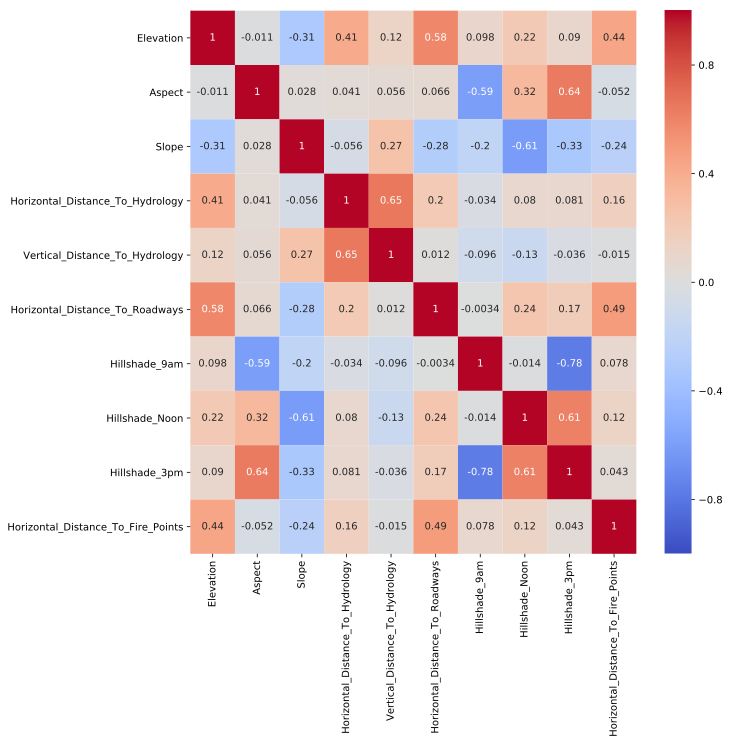

In [58]:
plt.subplots(figsize=(10,10))
sns.heatmap(train[cols_to_corr].corr(), vmin=-1, vmax=1, cmap='coolwarm',annot=True)
plt.savefig('heatmap.svg', format='svg')
plt.savefig('heatmap.png', dpi=300)
plt.show();

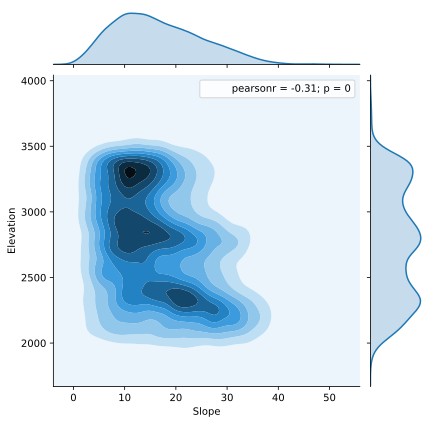

In [47]:
sns.jointplot(x='Slope',y='Elevation', data=train, kind='kde')
plt.savefig('slope_elevation.svg', format='svg')
plt.savefig('slope_elevation.png', dpi=300)
plt.show();

In [ ]:
sns.pairplot(train[cols_to_corr])
plt.savefig('pair_plot.svg', format='svg')
plt.savefig('pair_plot.png', dpi=300)
plt.show();

In [ ]:
sns.jointplot(x='Hillshade_9am',y='Aspect', data=train, kind='kde')
plt.savefig('9am_aspect.svg', format='svg')
plt.savefig('9am_aspect.png', dpi=300)
plt.show();

In [ ]:
sns.jointplot(x='Hillshade_3pm',y='Aspect', data=train, kind='kde')
plt.savefig('3pm_aspect.svg', format='svg')
plt.savefig('3pm_aspect.png', dpi=300)
plt.show();

In [ ]:
sns.jointplot(x='Hillshade_Noon',y='Aspect', data=train, kind='kde')
plt.savefig('noon_aspect.svg', format='svg')
plt.savefig('noon_aspect.png', dpi=300)
plt.show();

# Modeling with binary classified categorical features and appropriate models (KNN, SVM)

## Scale the dataset using minmax scaler and standard scaler. Scale both before and after train test split

In [28]:
#Scale entire train dataset using minmax scaler
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))
X_minmax = min_max_scaler.fit_transform(X)

In [29]:
#scale test data set using min_max_scaler created above
#for testing this model on kaggle competition test data
X_test_X = test.drop(['Cover_Type', 'Id',],1)
X_test_minmax_X = min_max_scaler.transform(X_test_X)

In [30]:
#scale entire train dataset using standard scaler
scaler = preprocessing.StandardScaler()
scaler.fit(X)
scaled_test = scaler.transform(X)

In [27]:
# Create X and Y variables for train test split for scaling
X = train.drop(['Id','Cover_Type'],1)
y = train['Cover_Type']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.3, random_state=42)

In [31]:
#Scale after train/test split using minmax scaler
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))
X_train_minmax = min_max_scaler.fit_transform(X_train)
X_test_minmax = min_max_scaler.transform(X_test)

## KNN Section

In [34]:
#KNN on minmax X_train/test
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_minmax,y_train)
y_pred_knn_minmax = knn.predict(X_test_minmax)
print(metrics.accuracy_score(y_test,y_pred_knn_minmax))
#result, this does poorly with prediction on the entire dataset. KNN 5 better than KNN 50

0.7819664902998237


### Test on Kaggle Test Dataset and create CSV for KNN

In [33]:
#test KNN using the actual test dataset
knn_pred_test_set = knn.predict(X_test_minmax_X)
test['Cover_Type'] = knn_pred_test_set
test_ans_5 = test[['Id','Cover_Type']]
test_ans_5.to_csv('submission_5.csv', index=False)
#result, this does poorly with prediction on the entire dataset.

## SVM Section

In [35]:
#Linear SVC on minmax X_train/test
model_svm_minmax = SVC(C=2.0, kernel='linear')
model_svm_minmax.fit(X_train_minmax, y_train)
y_pred_svm_minmax = model_svm_minmax.predict(X_test_minmax)
accuracy_score(y_test, y_pred_svm_minmax)

0.7222222222222222

In [36]:
#SVC on non scaled data
model_svm = SVC()
model_svm.fit(X_train, y_train)
y_pred_svm = model_svm.predict(X_test)
accuracy_score(y_test, y_pred_svm)
#This does very poorly evidence that scaling is very important.

0.13866843033509701

### Gridsearch CV to try and id best parameters for LinearSVC

In [57]:
#gridsearchcv with Linear SVC
def svc_param_selection(X, y, nfolds=5):
    penalty = ['l1']
    Cs = [1, 10, 100] #used to run with more lower values, but takes a long time. result was 100
    param_grid = {'penalty': penalty, 'C': Cs}
    grid_search = GridSearchCV(LinearSVC(dual=False), param_grid, cv=nfolds)
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.best_params_

In [58]:
svc_param_selection(X_minmax, y, 10)

{'C': 100, 'penalty': 'l1'}

In [65]:
#Using minmax, train new model using best params from above
model_svm2_minmax = LinearSVC(C=100.0)
model_svm2_minmax.fit(X_train_minmax, y_train)
y_pred_svm_2_minmax = model_svm2_minmax.predict(X_test_minmax)
accuracy_score(y_test, y_pred_svm_2_minmax)

0.48655202821869487

In [69]:
model_svm2_minmax = LinearSVC(C=10.0, penalty='l1', dual=False)
model_svm2_minmax.fit(X_train_minmax, y_train)
y_pred_svm_2_minmax = model_svm2_minmax.predict(X_test_minmax)
accuracy_score(y_test, y_pred_svm_2_minmax)

0.6728395061728395

### Run and create a submission for the kaggle competition using the model created above.

In [124]:
#run the above model on the entire Kaggle test dataset, create a CSV to submit for scoring
new_predicts_test_set = model_svm2_minmax.predict(X_test_minmax_X)
test['Cover_Type'] = new_predicts_test_set
test_ans_3 = test[['Id','Cover_Type']]
test_ans_3.to_csv('submission_3.csv', index=False)

### Gridsearch CV to try and id best parameters for LinearSVC

In [68]:
#gridsearchcv with RBF SVC
def svc_param_selection_rbf(X, y, nfolds):
    Cs = [0.001, 0.01, 0.1, 1, 10]
    gammas = [0.001, 0.01, 0.1, 1]
    param_grid = {'C': Cs, 'gamma' : gammas}
    grid_search = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=nfolds)
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.best_params_

In [69]:
svc_param_selection_rbf(X_minmax, y, 10)

{'C': 10, 'gamma': 1}

In [73]:
#Run model with best parameters on entire Kaggle test dataset, create a CSV to submit for scoring
svc_rbf_kaggle = SVC(kernel='rbf',C=10,gamma=1)
svc_rbf_kaggle.fit(X_minmax,y)
rbf_kaggle = svc_rbf_kaggle.predict(X_test_minmax_X)
test['Cover_Type'] = rbf_kaggle
test_ans_8 = test[['Id','Cover_Type']]
test_ans_8.to_csv('submission_8.csv', index=False)

In [163]:
rbf_kaggle

array(['2', '1', '1', ..., '3', '3', '3'], dtype=object)

In [104]:
df_to_join = train.drop(cols_to_scale,1)
train_scaled = df_to_join.join(scaled_df)

In [107]:
cols_to_scale = ['Elevation','Aspect','Slope','Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology','Horizontal_Distance_To_Roadways','Hillshade_9am','Hillshade_Noon','Hillshade_3pm','Horizontal_Distance_To_Fire_Points']
df_to_scale_2 = test[cols_to_scale]
scaler_2 = preprocessing.StandardScaler()
scaled_2 = scaler_2.fit_transform(df_to_scale_2)
scaled_df_2 = pd.DataFrame(scaled_2, columns=cols_to_scale)
df_to_join2 = test.drop(cols_to_scale,1)
test_scaled = df_to_join2.join(scaled_df_2)

In [110]:
test_scaled['Cover_Type'] = 0

In [115]:
X_test_real = test_scaled.drop(['Cover_Type','Id'],1)

In [121]:
confusion_matrix(y_test, y_pred_svm)

array([[442, 100,   1,   0,  31,   2,  44],
       [149, 354,  25,   1, 102,  18,   9],
       [  0,   1, 391,  99,  21, 133,   0],
       [  0,   0,  22, 623,   0,  16,   0],
       [ 10,  63,  28,   0, 525,  24,   0],
       [  0,  19, 122,  65,  13, 431,   0],
       [ 79,   0,   0,   0,   2,   0, 571]])

In [125]:
metrics.f1_score(y_test, y_pred_svm, average='micro')

0.7356701940035273

In [129]:
accuracy_score(y_test,y_pred_svm_2)

0.6510141093474426

drop cols from train_clas that have been unbinaried... try to do some random forest work

In [ ]:
#cols_to_corr=['Elevation','Aspect','Slope','Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology','Horizontal_Distance_To_Roadways','Hillshade_9am','Hillshade_Noon','Hillshade_3pm','Horizontal_Distance_To_Fire_Points' ]

In [55]:
test_clas.head()

Id  Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0  15121       2680     354     14                                 0   
1  15122       2683       0     13                                 0   
2  15123       2713      16     15                                 0   
3  15124       2709      24     17                                 0   
4  15125       2706      29     19                                 0   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                               0                             2684   
1                               0                             2654   
2                               0                             2980   
3                               0                             2950   
4                               0                             2920   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0            196             214            156   
1            201             216            152   
2            206             208            137   
3            208             201            125   
4            210             195            115   

   Horizontal_Distance_To_Fire_Points Wilderness_Area Soil_Type  Cover_Type  
0                                6645               1        29           0  
1                                6675               1        29           0  
2                                6344               1        29           0  
3                                6374               1        29           0  
4                                6404               1        29           0

# Modeling with Trees, Forests, and Catergorical Features

### Playing with CatBoost

In [151]:
cat_test_kaggle = test_clas.drop(['Id'],1)

In [193]:
cat_X = train_clas.drop(['Cover_Type','Id', 'Cover_Type_Name', 'Wilderness_Area_Name'],1)
cat_y = train_clas['Cover_Type']
X_train_cat, X_test_cat, y_train_cat, y_test_cat = train_test_split(cat_X, cat_y, test_size=.3, random_state=42)

In [194]:
categorical_features_indices = np.where(X_train_cat.dtypes != np.int64)[0]

In [195]:
cat_pool = Pool(data = X_train_cat, label=y_train_cat, cat_features=categorical_features_indices)

In [204]:
cat_tree = CatBoostClassifier(iterations=500, depth=None, learning_rate=0.35, loss_function='MultiClass')

In [205]:
cat_tree.fit(cat_pool)

0:	learn: -1.3763988	total: 213ms	remaining: 1m 46s
1:	learn: -1.1539230	total: 360ms	remaining: 1m 29s
2:	learn: -1.0092377	total: 531ms	remaining: 1m 27s
3:	learn: -0.9246927	total: 668ms	remaining: 1m 22s
4:	learn: -0.8640478	total: 832ms	remaining: 1m 22s
5:	learn: -0.8184679	total: 991ms	remaining: 1m 21s
6:	learn: -0.7836547	total: 1.16s	remaining: 1m 21s
7:	learn: -0.7538211	total: 1.31s	remaining: 1m 20s
8:	learn: -0.7346659	total: 1.48s	remaining: 1m 20s
9:	learn: -0.7096206	total: 1.63s	remaining: 1m 20s
10:	learn: -0.7010112	total: 1.78s	remaining: 1m 19s
11:	learn: -0.6959756	total: 1.9s	remaining: 1m 17s
12:	learn: -0.6829561	total: 2.07s	remaining: 1m 17s
13:	learn: -0.6759676	total: 2.21s	remaining: 1m 16s
14:	learn: -0.6651857	total: 2.39s	remaining: 1m 17s
15:	learn: -0.6574634	total: 2.51s	remaining: 1m 15s
16:	learn: -0.6403405	total: 2.7s	remaining: 1m 16s
17:	learn: -0.6286903	total: 2.9s	remaining: 1m 17s
18:	learn: -0.6196492	total: 3.21s	remaining: 1m 21s
19:	le

158:	learn: -0.2890580	total: 25.8s	remaining: 55.4s
159:	learn: -0.2876927	total: 26s	remaining: 55.2s
160:	learn: -0.2869166	total: 26.1s	remaining: 55.1s
161:	learn: -0.2862046	total: 26.3s	remaining: 54.9s
162:	learn: -0.2849023	total: 26.5s	remaining: 54.8s
163:	learn: -0.2834738	total: 26.6s	remaining: 54.6s
164:	learn: -0.2817999	total: 26.8s	remaining: 54.4s
165:	learn: -0.2806677	total: 26.9s	remaining: 54.2s
166:	learn: -0.2798155	total: 27.1s	remaining: 54.1s
167:	learn: -0.2790880	total: 27.3s	remaining: 53.9s
168:	learn: -0.2783580	total: 27.5s	remaining: 53.8s
169:	learn: -0.2771919	total: 27.6s	remaining: 53.6s
170:	learn: -0.2766725	total: 27.8s	remaining: 53.4s
171:	learn: -0.2759983	total: 27.9s	remaining: 53.3s
172:	learn: -0.2754751	total: 28.1s	remaining: 53.1s
173:	learn: -0.2749308	total: 28.3s	remaining: 53s
174:	learn: -0.2737443	total: 28.4s	remaining: 52.8s
175:	learn: -0.2731505	total: 28.6s	remaining: 52.6s
176:	learn: -0.2723686	total: 28.7s	remaining: 52.

314:	learn: -0.1829461	total: 51s	remaining: 29.9s
315:	learn: -0.1826968	total: 51.1s	remaining: 29.8s
316:	learn: -0.1822421	total: 51.3s	remaining: 29.6s
317:	learn: -0.1818031	total: 51.4s	remaining: 29.4s
318:	learn: -0.1812982	total: 51.6s	remaining: 29.3s
319:	learn: -0.1810214	total: 51.7s	remaining: 29.1s
320:	learn: -0.1803586	total: 51.9s	remaining: 28.9s
321:	learn: -0.1797876	total: 52s	remaining: 28.7s
322:	learn: -0.1793050	total: 52.2s	remaining: 28.6s
323:	learn: -0.1790254	total: 52.3s	remaining: 28.4s
324:	learn: -0.1785268	total: 52.5s	remaining: 28.2s
325:	learn: -0.1782696	total: 52.6s	remaining: 28.1s
326:	learn: -0.1779488	total: 52.8s	remaining: 27.9s
327:	learn: -0.1772618	total: 52.9s	remaining: 27.8s
328:	learn: -0.1768913	total: 53.1s	remaining: 27.6s
329:	learn: -0.1762567	total: 53.2s	remaining: 27.4s
330:	learn: -0.1759466	total: 53.4s	remaining: 27.3s
331:	learn: -0.1754601	total: 53.5s	remaining: 27.1s
332:	learn: -0.1750026	total: 53.7s	remaining: 26.

469:	learn: -0.1256743	total: 1m 16s	remaining: 4.89s
470:	learn: -0.1255571	total: 1m 16s	remaining: 4.73s
471:	learn: -0.1250172	total: 1m 16s	remaining: 4.57s
472:	learn: -0.1246581	total: 1m 17s	remaining: 4.4s
473:	learn: -0.1244941	total: 1m 17s	remaining: 4.24s
474:	learn: -0.1241503	total: 1m 17s	remaining: 4.08s
475:	learn: -0.1237767	total: 1m 17s	remaining: 3.92s
476:	learn: -0.1234771	total: 1m 17s	remaining: 3.75s
477:	learn: -0.1231810	total: 1m 18s	remaining: 3.59s
478:	learn: -0.1230082	total: 1m 18s	remaining: 3.43s
479:	learn: -0.1226479	total: 1m 18s	remaining: 3.27s
480:	learn: -0.1222937	total: 1m 18s	remaining: 3.1s
481:	learn: -0.1221554	total: 1m 18s	remaining: 2.94s
482:	learn: -0.1218292	total: 1m 18s	remaining: 2.78s
483:	learn: -0.1216714	total: 1m 19s	remaining: 2.61s
484:	learn: -0.1213444	total: 1m 19s	remaining: 2.45s
485:	learn: -0.1211030	total: 1m 19s	remaining: 2.29s
486:	learn: -0.1207970	total: 1m 19s	remaining: 2.13s
487:	learn: -0.1205390	total: 

In [203]:
cat_guesses = cat_tree.predict(X_test_cat)
cat_guesses = cat_guesses.flatten()
cat_guesses = [str(int(i)) for i in cat_guesses]
accuracy_score(cat_guesses, y_test_cat)

0.8597883597883598

In [189]:
categorical_features_indices = np.where(cat_X.dtypes != np.int64)[0]
cat_pool_kaggle = Pool(data = cat_X, label=cat_y, cat_features=categorical_features_indices)
cat_tree = CatBoostClassifier(iterations=500, depth=None, learning_rate=0.3, loss_function='MultiClass')
cat_tree.fit(cat_pool_kaggle)

0:	learn: -1.4368100	total: 307ms	remaining: 2m 32s
1:	learn: -1.2122562	total: 565ms	remaining: 2m 20s
2:	learn: -1.0777363	total: 808ms	remaining: 2m 13s
3:	learn: -0.9552023	total: 1.07s	remaining: 2m 12s
4:	learn: -0.8825561	total: 1.32s	remaining: 2m 10s
5:	learn: -0.8314370	total: 1.6s	remaining: 2m 11s
6:	learn: -0.7975939	total: 1.86s	remaining: 2m 10s
7:	learn: -0.7683923	total: 2.14s	remaining: 2m 11s
8:	learn: -0.7445283	total: 2.52s	remaining: 2m 17s
9:	learn: -0.7276486	total: 2.79s	remaining: 2m 16s
10:	learn: -0.7105208	total: 3.05s	remaining: 2m 15s
11:	learn: -0.6970818	total: 3.3s	remaining: 2m 14s
12:	learn: -0.6792655	total: 3.6s	remaining: 2m 14s
13:	learn: -0.6699771	total: 3.88s	remaining: 2m 14s
14:	learn: -0.6598234	total: 4.18s	remaining: 2m 15s
15:	learn: -0.6481062	total: 4.48s	remaining: 2m 15s
16:	learn: -0.6466579	total: 4.67s	remaining: 2m 12s
17:	learn: -0.6355219	total: 4.96s	remaining: 2m 12s
18:	learn: -0.6297231	total: 5.25s	remaining: 2m 12s
19:	le

156:	learn: -0.3050044	total: 47.6s	remaining: 1m 43s
157:	learn: -0.3045135	total: 47.8s	remaining: 1m 43s
158:	learn: -0.3041017	total: 48.1s	remaining: 1m 43s
159:	learn: -0.3034969	total: 48.4s	remaining: 1m 42s
160:	learn: -0.3028872	total: 48.7s	remaining: 1m 42s
161:	learn: -0.3013197	total: 49s	remaining: 1m 42s
162:	learn: -0.3000025	total: 49.3s	remaining: 1m 41s
163:	learn: -0.2996157	total: 49.6s	remaining: 1m 41s
164:	learn: -0.2992671	total: 49.9s	remaining: 1m 41s
165:	learn: -0.2983762	total: 50.2s	remaining: 1m 41s
166:	learn: -0.2975654	total: 50.6s	remaining: 1m 40s
167:	learn: -0.2970357	total: 50.8s	remaining: 1m 40s
168:	learn: -0.2962616	total: 51.1s	remaining: 1m 40s
169:	learn: -0.2950931	total: 51.4s	remaining: 1m 39s
170:	learn: -0.2940175	total: 51.7s	remaining: 1m 39s
171:	learn: -0.2928516	total: 52s	remaining: 1m 39s
172:	learn: -0.2920136	total: 52.3s	remaining: 1m 38s
173:	learn: -0.2915038	total: 52.6s	remaining: 1m 38s
174:	learn: -0.2905750	total: 52

308:	learn: -0.2064430	total: 1m 32s	remaining: 57.3s
309:	learn: -0.2061161	total: 1m 33s	remaining: 57s
310:	learn: -0.2055250	total: 1m 33s	remaining: 56.7s
311:	learn: -0.2051807	total: 1m 33s	remaining: 56.4s
312:	learn: -0.2046808	total: 1m 33s	remaining: 56.1s
313:	learn: -0.2042454	total: 1m 34s	remaining: 55.8s
314:	learn: -0.2039118	total: 1m 34s	remaining: 55.5s
315:	learn: -0.2035803	total: 1m 34s	remaining: 55.2s
316:	learn: -0.2033559	total: 1m 35s	remaining: 54.9s
317:	learn: -0.2029041	total: 1m 35s	remaining: 54.6s
318:	learn: -0.2026504	total: 1m 35s	remaining: 54.3s
319:	learn: -0.2020143	total: 1m 35s	remaining: 54s
320:	learn: -0.2018647	total: 1m 36s	remaining: 53.6s
321:	learn: -0.2012978	total: 1m 36s	remaining: 53.3s
322:	learn: -0.2011424	total: 1m 36s	remaining: 53s
323:	learn: -0.2008846	total: 1m 37s	remaining: 52.7s
324:	learn: -0.2005571	total: 1m 37s	remaining: 52.4s
325:	learn: -0.2002539	total: 1m 37s	remaining: 52.1s
326:	learn: -0.1998928	total: 1m 3

462:	learn: -0.1535707	total: 2m 18s	remaining: 11s
463:	learn: -0.1532879	total: 2m 18s	remaining: 10.7s
464:	learn: -0.1530479	total: 2m 18s	remaining: 10.4s
465:	learn: -0.1527731	total: 2m 19s	remaining: 10.2s
466:	learn: -0.1524361	total: 2m 19s	remaining: 9.85s
467:	learn: -0.1519027	total: 2m 19s	remaining: 9.55s
468:	learn: -0.1517194	total: 2m 19s	remaining: 9.25s
469:	learn: -0.1515399	total: 2m 20s	remaining: 8.95s
470:	learn: -0.1511119	total: 2m 20s	remaining: 8.65s
471:	learn: -0.1508319	total: 2m 20s	remaining: 8.35s
472:	learn: -0.1507169	total: 2m 21s	remaining: 8.06s
473:	learn: -0.1505947	total: 2m 21s	remaining: 7.76s
474:	learn: -0.1504049	total: 2m 21s	remaining: 7.46s
475:	learn: -0.1500576	total: 2m 21s	remaining: 7.16s
476:	learn: -0.1495858	total: 2m 22s	remaining: 6.86s
477:	learn: -0.1493715	total: 2m 22s	remaining: 6.56s
478:	learn: -0.1491169	total: 2m 22s	remaining: 6.26s
479:	learn: -0.1489863	total: 2m 23s	remaining: 5.96s
480:	learn: -0.1487421	total: 

In [192]:
cat_guesses_kaggle = cat_tree.predict(cat_test_kaggle)
cat_guesses_kaggle = cat_guesses_kaggle.flatten()
cat_guesses_kaggle = [str(int(i)) for i in cat_guesses_kaggle]
test_clas['Cover_Type'] = cat_guesses_kaggle
test_ans = test_clas[['Id','Cover_Type']]
test_ans.to_csv('submission_9.csv', index=False)

In [125]:
# Kaggle result was as good as my best forest.

TypeError: only size-1 arrays can be converted to Python scalars

### End of cat_boost testing

In [208]:
test_clas.head(1)

Id  Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0  15121       2680     354     14                                 0   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                               0                             2684   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm     ...      Soil_Type32  \
0            196             214            156     ...                0   

   Soil_Type33  Soil_Type34  Soil_Type35  Soil_Type36  Soil_Type37  \
0            0            0            0            0            0   

   Soil_Type38  Soil_Type39  Soil_Type40  Cover_Type  
0            0            0            0           0  

[1 rows x 56 columns]

In [276]:
sample = list(X_train_forest.iloc[0])
sample_answer = y_train_forest[0]

In [210]:
X_test_case_clas = test.drop(['Cover_Type', 'Id'],1)

In [280]:
decisiontree.predict(np.matrix(sample))

array(['5'], dtype=object)

In [211]:
X_train_forest = train.drop(['Cover_Type', 'Id'],1)
y_train_forest = train['Cover_Type']

In [219]:
X_train_forest_X, X_test_forest_X, y_train_forest_y, y_test_forest_y = train_test_split(X_train_forest,y_train_forest,test_size=.3, random_state=42)

In [231]:
#Create a decision tree model on train/test data split and evaluate score on test data.
decisiontree = DecisionTreeClassifier()
decisiontree.fit(X_train_forest_X, y_train_forest_y)
decisiontree.score(X_test_forest_X, y_test_forest_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [246]:
#train a generic random forest model and score on test data
random_forest = RandomForestClassifier()
random_forest.fit(X_train_forest_X, y_train_forest_y)
random_forest.score(X_test_forest_X, y_test_forest_y)

0.8249559082892416

In [221]:
# #run a grid search with the below parameters on a random forest classifier model to determine best model params
# Commented out because it took 15 minutes to run.
# randomforest = RandomForestClassifier(random_state = 42)
# param_grid = { 
#     'n_estimators': [100, 200, 500],
#     'max_features': ['auto', 'sqrt', 'log2'],
#     'max_depth' : [6,7,8, None],
#     'criterion' :['gini', 'entropy']
# }
# CV_rfc = GridSearchCV(estimator=randomforest, param_grid = param_grid, cv=10)
# CV_rfc.fit(X_train_forest_X, y_train_forest_y)

GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [100, 200, 500], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [6, 7, 8, None], 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [223]:
#Find best parameters from CV grid search above
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'n_estimators': 500}

In [247]:
#train a more optimized random forest model and score it on test data
random_forest_optimized = RandomForestClassifier(n_estimators=500, random_state=42)
random_forest_optimized.fit(X_train_forest_X, y_train_forest_y)
random_forest_optimized.predict(X_test_forest_X)
random_forest_optimized.score(X_test_forest_X, y_test_forest_y)

0.8655202821869489

In [251]:
#train a model using train test split on extratreesclassifier
forest = ExtraTreesClassifier(n_estimators=200, random_state=42)
forest.fit(X_train_forest_X, y_train_forest_y)
y_pred_forest = forest.predict(X_test_forest_X)
forest.score(X_test_forest_X, y_test_forest_y)

0.8604497354497355

In [253]:
import_features = forest.feature_importances_

In [257]:
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

In [258]:
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Feature ranking:
1. feature 0 (0.156395)
2. feature 5 (0.079033)
3. feature 9 (0.065607)
4. feature 3 (0.059087)
5. feature 13 (0.053514)
6. feature 4 (0.051145)
7. feature 1 (0.050705)
8. feature 6 (0.049813)


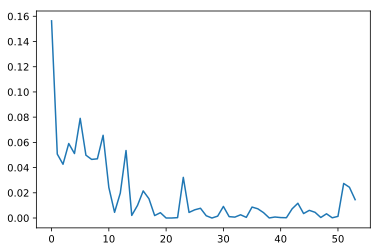

In [256]:
plt.plot(import_features)

In [252]:
confusion_matrix(y_pred_forest, y_test_forest_y)

array([[461, 106,   0,   0,   3,   0,  18],
       [107, 464,   2,   0,  17,   3,   3],
       [  1,  23, 525,   6,  14,  60,   0],
       [  0,   0,  39, 648,   0,  22,   0],
       [ 21,  50,   2,   0, 612,   3,   0],
       [  1,  13,  77,   7,   4, 562,   0],
       [ 29,   2,   0,   0,   0,   0, 631]])

# Kaggle Models

In [60]:
# Using decision tree model from above, test on kaggle test data
#note this model was still created from train/test split data and not on all avaialble test data.
#therefore it underperforms a little
new_pred = decisiontree.predict(X_test_forest_X)
test_clas['Cover_Type'] = new_pred
test_ans = test_clas[['Id','Cover_Type']]
test_ans.to_csv('submission_1.csv', index=False)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [68]:
# Using a random forest model, make predictions on the Kaggle test data for submission.
test_clas['Cover_Type'] = randomforest.predict(X_test_clas)
test_ans = test_clas[['Id','Cover_Type']]
test_ans.to_csv('submission_2.csv', index=False)

In [233]:
#Train a model using the entire train dataset to them use on the entire kaggle test set for submission
forest2 = ExtraTreesClassifier(n_estimators=200, random_state=42)
forest2.fit(X_train_forest, y_train_forest)

#use the model forest2 to test on the test cases from Kaggle and export as a csv to submit
predicts_new = forest2.predict(X_test_case_clas)
test_clas['Cover_Type'] = predicts_new
test_ans = test_clas[['Id','Cover_Type']]
test_ans.to_csv('submission_7.csv', index=False)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

NameError: name 'predicts_new' is not defined

# Testing sample using Naive Bayes model

In [76]:
NB_model = naive_bayes.GaussianNB()
NB_model.fit(X_train, y_train)
accuracy_score(y_test, NB_model.predict(X_test))

0.46847442680776014

In [77]:
NB_model_2 = naive_bayes.BernoulliNB()
NB_model_2.fit(X_train, y_train)
accuracy_score(y_test, NB_model_2.predict(X_test))

0.6064814814814815

In [72]:
X_train['Vertical_Distance_To_Hydrology'] = abs(X_train['Vertical_Distance_To_Hydrology'])

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [75]:
NB_model_3 = naive_bayes.MultinomialNB()
NB_model_3.fit(X_train, y_train)
accuracy_score(y_test, NB_model_3.predict(X_test))

0.5961199294532628

In [76]:
NB_model = naive_bayes.GaussianNB()
NB_model.fit(X_train_minmax, y_train)
accuracy_score(y_test, NB_model.predict(X_test_minmax))

0.46847442680776014

In [77]:
NB_model_2 = naive_bayes.BernoulliNB()
NB_model_2.fit(X_train_minmax, y_train)
accuracy_score(y_test, NB_model_2.predict(X_test_minmax))

0.6064814814814815

In [75]:
NB_model_3 = naive_bayes.MultinomialNB()
NB_model_3.fit(X_train_minmax, y_train)
accuracy_score(y_test, NB_model_3.predict(X_test_minmax))

0.5961199294532628